In [200]:
import numpy as np
from scipy.signal import butter, filtfilt, welch
import matplotlib.pyplot as plt
import mne

In [201]:
raw=mne.io.read_raw_eeglab("D:\SRM\ALZHEIMER DATA\drive-download-20240204T131356Z-002\sub-004\eeg\sub-004_task-eyesclosed_eeg.set")
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Demon\AppData\Local\Temp\ipykernel_26552\1365081084.py:1: SyntaxWarning: invalid escape sequence '\S'
  raw=mne.io.read_raw_eeglab("D:\SRM\ALZHEIMER DATA\drive-download-20240204T131356Z-002\sub-004\eeg\sub-004_task-eyesclosed_eeg.set")
C:\Users\Demon\AppData\Local\Temp\ipykernel_26552\1365081084.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw=mne.io.read_raw_eeglab("D:\SRM\ALZHEIMER DATA\drive-download-20240204T131356Z-002\sub-004\eeg\sub-004_task-eyesclosed_eeg.set")
C:\Users\Demon\AppData\Local\Temp\ipykernel_26552\1365081084.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw=mne.io.read_raw_eeglab("D:\SRM\ALZHEIMER DATA\drive-download-20240204T131356Z-002\sub-004\eeg\sub-004_ta

In [202]:
raw.filter(1,40)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


Effective window size : 0.512 (s)


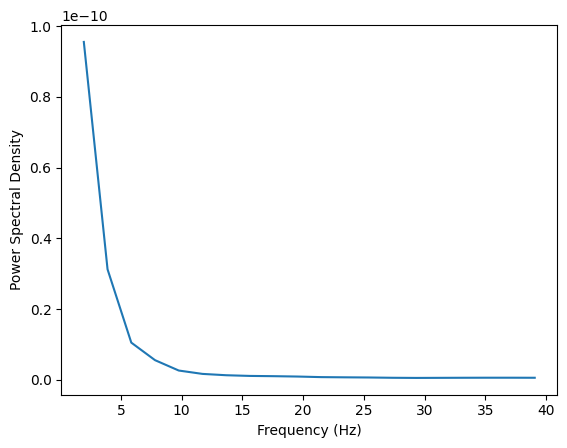

In [203]:
# Convert EEG data to NumPy array
data, times = raw[:, :]  # Get all data and times
sfreq = raw.info['sfreq']  # Sampling frequency

# Calculate the power spectral density using psd_array_welch
psd, freqs = mne.time_frequency.psd_array_welch(data, sfreq, fmin=1, fmax=40)

# Visualize power spectral density
import matplotlib.pyplot as plt
plt.plot(freqs, psd.mean(0))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.show()


In [204]:
# Extract time-domain features
mean_amp = np.mean(raw.get_data(), axis=1)
rms = np.sqrt(np.mean(raw.get_data() ** 2, axis=1))
variance = np.var(raw.get_data(), axis=1)
# You can extract other time-domain features similarly
# Convert EEG data to NumPy array
data, times = raw[:, :]  # Get all data and times
sfreq = raw.info['sfreq']  # Sampling frequency
# Extract frequency-domain features
psd, freqs = mne.time_frequency.psd_array_welch(data, sfreq, fmin=1, fmax=40)
peak_freq = freqs[np.argmax(psd, axis=1)]
spectral_entropy = -np.sum(psd * np.log2(psd), axis=1)

# Extract connectivity measures


# You can extract other features similarly

# Print or use extracted features as needed
print("Mean amplitude:", mean_amp)
print("RMS:", rms)
print("Variance:", variance)

Effective window size : 0.512 (s)
Mean amplitude: [-5.51314782e-09  1.83070563e-09 -1.40161726e-10 -5.60979307e-10
 -5.64316765e-09 -9.63316864e-10 -1.00589565e-09 -3.67658240e-09
 -2.63510988e-09 -3.69567431e-09 -7.18784907e-09 -1.76704639e-09
 -6.27536083e-09  3.73179372e-11 -1.51956334e-09 -1.98409119e-09
 -5.82820819e-11  6.88060384e-10 -7.95024491e-10]
RMS: [2.45956948e-05 2.46282989e-05 2.51646734e-05 2.45816831e-05
 2.40651117e-05 2.40443143e-05 2.43776385e-05 2.44138032e-05
 2.50400242e-05 2.50042304e-05 2.61721904e-05 2.51330985e-05
 2.52472773e-05 2.48766905e-05 2.45710662e-05 2.45737025e-05
 2.42970049e-05 2.43280672e-05 2.42337695e-05]
Variance: [6.04948172e-10 6.06553103e-10 6.33260788e-10 6.04259143e-10
 5.79129571e-10 5.78129049e-10 5.94269260e-10 5.96033773e-10
 6.27002803e-10 6.25211526e-10 6.84983500e-10 6.31672636e-10
 6.37424974e-10 6.18849731e-10 6.03737290e-10 6.03866849e-10
 5.90344448e-10 5.91854851e-10 5.87275586e-10]


In [205]:
#EEG Time domain features
import numpy as np
from scipy.stats import kurtosis, skew

# Get EEG data
data = raw.get_data()

# Calculate kurtosis and skewness for each channel
kurtosis_values = np.apply_along_axis(kurtosis, axis=1, arr=data)
skewness_values = np.apply_along_axis(skew, axis=1, arr=data)

# Calculate Hjorth parameters
def hjorth_mobility_activity(data):
    diff1 = np.diff(data)
    diff1_sq = diff1 ** 2
    activity = np.var(data)
    mobility = np.sqrt(np.var(diff1_sq) / np.var(data))
    complexity = np.sqrt(np.var(np.diff(diff1)) / np.var(diff1))
    return mobility, activity, complexity

hjorth_params = np.apply_along_axis(hjorth_mobility_activity, axis=1, arr=data)

# Extracted features:
print("Kurtosis values:", kurtosis_values)
print("Skewness values:", skewness_values)
print("Hjorth parameters (mobility, activity, complexity):", hjorth_params)

Kurtosis values: [0.31524173 0.14924572 0.21205387 0.23796643 0.11671574 0.11463806
 0.12497453 0.12527822 0.12033103 0.15129612 0.15276752 0.11967203
 0.17222171 0.11708132 0.13584006 0.10888755 0.17921999 0.42409438
 0.10731189]
Skewness values: [ 0.0212849  -0.01671611  0.00336211  0.01435598 -0.0149944  -0.00637073
 -0.01167633 -0.01096919 -0.00681858 -0.014442   -0.05101663 -0.0236618
 -0.04554615 -0.01489171 -0.0275624  -0.0012272   0.002292    0.04813922
 -0.00921177]
Hjorth parameters (mobility, activity, complexity): [[8.96445465e-07 6.04948172e-10 3.92808878e-01]
 [5.69784890e-07 6.06553103e-10 3.76169474e-01]
 [7.25229569e-07 6.33260788e-10 4.14959601e-01]
 [6.59903570e-07 6.04259143e-10 3.72191588e-01]
 [1.77176978e-07 5.79129571e-10 3.38022372e-01]
 [1.66360194e-07 5.78129049e-10 3.32614891e-01]
 [1.46392360e-07 5.94269260e-10 3.22875629e-01]
 [1.79066967e-07 5.96033773e-10 3.41515787e-01]
 [1.88784057e-07 6.27002803e-10 3.43046942e-01]
 [1.97485428e-07 6.25211526e-10 3.51

In [206]:
#EEG Frequency domain features
from scipy.stats import entropy
# Peak frequency
peak_freq = freqs[np.argmax(psd, axis=1)]

# Spectral entropy
def calc_entropy(psd):
    return np.apply_along_axis(entropy, axis=1, arr=psd.T)

spectral_entropy = calc_entropy(psd)

# Spectral centroid
spectral_centroid = np.sum(freqs * psd, axis=1) / np.sum(psd, axis=1)

# Spectral flatness
def calc_flatness(psd):
    return np.apply_along_axis(lambda x: np.exp(np.mean(np.log(x))) / (np.mean(x)), axis=1, arr=psd.T)

spectral_flatness = calc_flatness(psd)

# Band power in specific frequency bands
# Define frequency bands
freq_bands = {
    'delta': [0.5, 4],
    'theta': [4, 8],
    'alpha': [8, 12],
    'beta': [12, 30],
    'gamma': [30, 40]
}

band_power = {}
for band, (low, high) in freq_bands.items():
    band_indices = np.where((freqs >= low) & (freqs <= high))[0]
    band_power[band] = np.sum(psd[:, band_indices], axis=1)

# Extracted features:
print("Peak frequency:", peak_freq)
print("Spectral entropy:", spectral_entropy)
print("Spectral centroid:", spectral_centroid)
print("Spectral flatness:", spectral_flatness)
print("Band power:", band_power)

Peak frequency: [1.953125 1.953125 1.953125 1.953125 1.953125 1.953125 1.953125 1.953125
 1.953125 1.953125 1.953125 1.953125 1.953125 1.953125 1.953125 1.953125
 1.953125 1.953125 1.953125]
Spectral entropy: [2.94391055 2.94377596 2.93965245 2.92962646 2.93971022 2.94097412
 2.9332995  2.91236996 2.8811405  2.86049677 2.85723348 2.86628034
 2.86515114 2.84210884 2.80202242 2.76436485 2.72980872 2.71129678
 2.71524656 2.70845455]
Spectral centroid: [4.89381315 4.62359262 6.29748626 4.54674826 3.9426165  3.90990531
 3.83898972 3.96881726 4.00118889 4.03818976 5.53393407 4.65788953
 4.61921176 5.15580763 4.02161234 4.0983079  4.10040291 3.8455938
 3.8440282 ]
Spectral flatness: [0.99947729 0.99934    0.99539576 0.98613988 0.99542364 0.99658339
 0.98934241 0.97099999 0.94472048 0.9261542  0.92286979 0.92775631
 0.92615128 0.90762264 0.8757536  0.84691901 0.81815194 0.80468732
 0.80823531 0.7996082 ]
Band power: {'delta': array([1.23820988e-10, 1.24762729e-10, 1.24518651e-10, 1.24307475e-1

In [207]:
#EEG Time-Frequency domain features
# Convert EEG data to NumPy array
data = raw.get_data()

# Calculate time-frequency representations
# Compute spectrograms
spectrogram = mne.time_frequency.stft(data, wsize=256)

# Extracted features:
print("Spectrogram shape:", spectrogram.shape)


Number of frequencies: 129
Number of time steps: 2759


Spectrogram shape: (19, 129, 2759)


In [208]:
#EEG Time-Frequency domain features
import pywt
# Get EEG data
data = raw.get_data()

# Calculate wavelet coefficients
# Choose wavelet and level of decomposition
wavelet = 'db4'  # Daubechies 4 wavelet
level = 5  # Level of decomposition
coeffs = pywt.wavedec(data, wavelet, level=level, axis=1)

# Calculate wavelet entropy
def wavelet_entropy(coeffs):
    entropy_values = []
    for coef in coeffs:
        norm_coef = np.abs(coef) ** 2
        norm_coef /= np.sum(norm_coef, axis=1, keepdims=True)  # Normalize coefficients
        entropy_values.append(-np.sum(norm_coef * np.log2(norm_coef), axis=1))
    return np.array(entropy_values)

wavelet_entropies = wavelet_entropy(coeffs)

# Extracted features:
print("Wavelet coefficients:", coeffs)
print("Wavelet entropies:", wavelet_entropies)


Wavelet coefficients: [array([[-7.25837684e-05, -6.78991223e-05, -7.13751553e-05, ...,
         1.04097317e-04,  9.52186638e-06,  2.47789179e-05],
       [-2.54876422e-05, -2.37828040e-05, -2.48158966e-05, ...,
         3.91359175e-05, -5.13849761e-05,  2.32240922e-05],
       [-2.13374563e-05, -1.84832133e-05, -1.98396275e-05, ...,
         9.70607343e-05,  8.05674322e-06,  4.67722318e-05],
       ...,
       [-5.39008852e-05, -5.05896506e-05, -5.30626430e-05, ...,
         3.87951059e-05, -2.81468127e-05,  2.61190061e-05],
       [-4.53685986e-05, -4.22635469e-05, -4.38028410e-05, ...,
         3.59139542e-05, -1.69611020e-05,  1.56942096e-05],
       [-3.92621580e-05, -3.68113101e-05, -3.82424975e-05, ...,
         2.16019888e-05, -2.65896868e-05,  1.02920906e-05]]), array([[ 8.38981019e-07,  3.89934978e-06,  2.13200359e-05, ...,
        -2.32743844e-06, -1.66317283e-05,  4.47928906e-06],
       [ 2.88294914e-07,  1.45938294e-06,  9.64497228e-06, ...,
        -8.27117562e-06, -3.295